In [27]:
import numpy as np 
import random 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten
import matplotlib.pyplot as plt


In [ ]:
X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter = ',')

X_test = np.loadtxt('input_test.csv',delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [ ]:
print("shape of X_train : ",X_train.shape)
print("shape of Y_train : ",Y_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of Y_test : ",Y_test.shape)

In [5]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("shape of X_train : ",X_train.shape)
print("shape of Y_train : ",Y_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of Y_test : ",Y_test.shape)

shape of X_train :  (2000, 100, 100, 3)
shape of Y_train :  (2000, 1)
shape of X_test :  (400, 100, 100, 3)
shape of Y_test :  (400, 1)


In [7]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

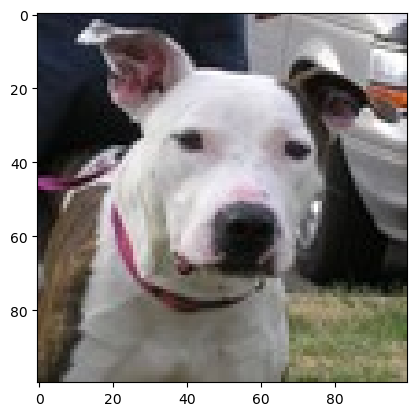

In [8]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [16]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(2,2),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
    
])


In [22]:
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics = ['accuracy'] )

In [23]:
model.fit(X_train,Y_train , epochs = 5 , batch_size = 64 )

Epoch 1/5
32/32 [==============================] - 11s 314ms/step - loss: 0.7241 - accuracy: 0.4965
Epoch 2/5
32/32 [==============================] - 10s 314ms/step - loss: 0.6708 - accuracy: 0.5735
Epoch 3/5
32/32 [==============================] - 10s 314ms/step - loss: 0.6281 - accuracy: 0.6505
Epoch 4/5
32/32 [==============================] - 10s 314ms/step - loss: 0.5922 - accuracy: 0.6930
Epoch 5/5
32/32 [==============================] - 10s 319ms/step - loss: 0.5656 - accuracy: 0.7200


In [24]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 46ms/step - loss: 0.6172 - accuracy: 0.6625


[0.6172453165054321, 0.6625000238418579]

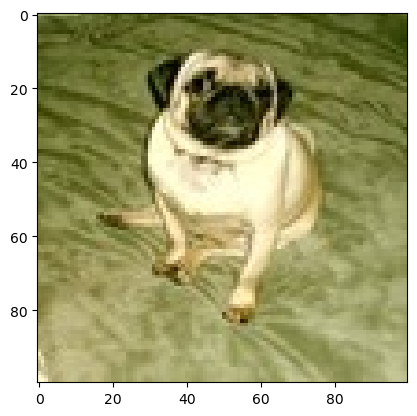

1/1 [==============================] - 0s 145ms/step
[[0.34263933]]


In [25]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

In [26]:
y_pred = y_pred > 0.5
if y_pred == 0:
    print("CAT")
else:
    print("DOG")

CAT
